In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/3992_bad2.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

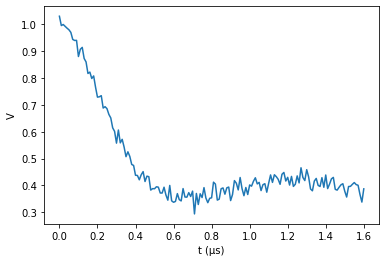

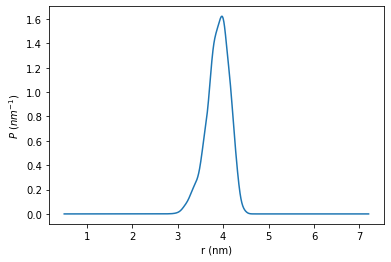

In [3]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [4]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 1453 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
There were 2277 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3434438358870284, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2661 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.24639358605316702, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1356 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5370723255359212, but should be close to 0.8. Try to increase the number of tuning steps.
There were 476 divergences after tuning. Increase `target_accept` or reparameterize.
The 

mean         sd    hdi_3%    hdi_97%  mcse_mean  mcse_sd  \
k          0.024      0.019     0.000      0.054      0.004    0.003   
λ          0.593      0.012     0.572      0.611      0.003    0.002   
V₀         0.983      0.008     0.969      1.002      0.001    0.001   
σ          0.020      0.001     0.018      0.022      0.000    0.000   
δ      19100.399  11192.112  2950.162  39101.792    622.141  440.317   
lg(α)      0.407      0.128     0.172      0.657      0.007    0.005   

       ess_bulk  ess_tail  r_hat  
k          20.0      32.0   1.15  
λ          14.0      41.0   1.22  
V₀         70.0      95.0   1.07  
σ        6297.0    8500.0   1.00  
δ         281.0     621.0   1.02  
lg(α)     294.0     673.0   1.02

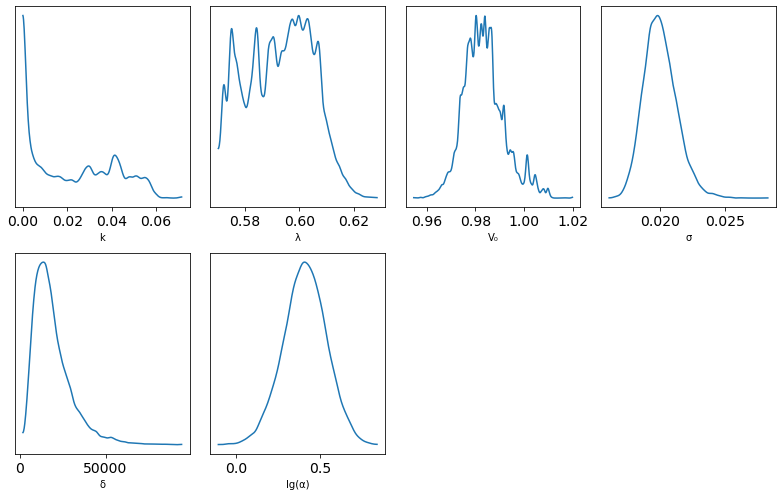

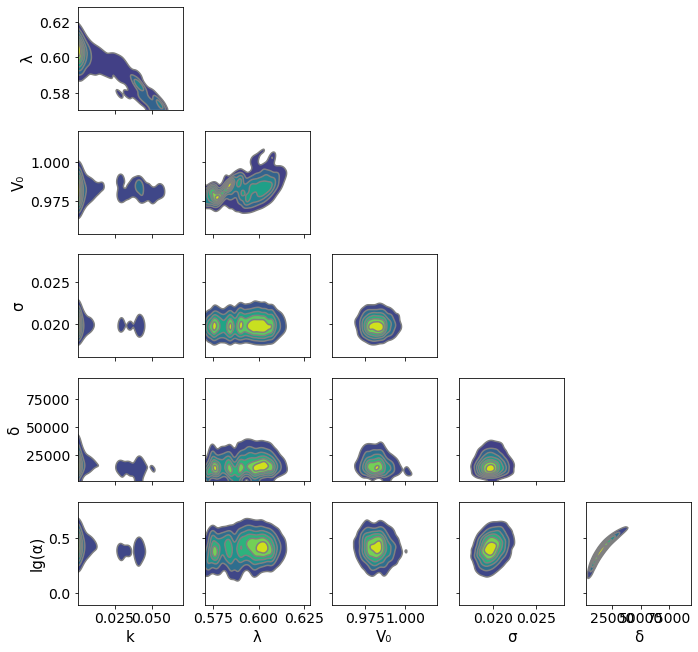

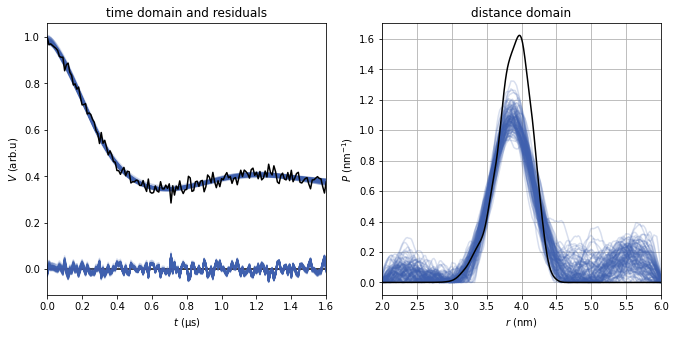

In [5]:
dive.summary(trace, model, Pid = Pid)  

## Two Gaussians

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 132 seconds.
The acceptance probability does not match the target. It is 0.8934206385365454, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8945705014265409, but should be close to 0.8. Try to increase the number of tuning steps.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
r0[0]  3.916  0.011   3.895    3.938      0.000      0.0   14186.0   12539.0   
w[0]   0.647  0.060   0.537    0.762      0.001      0.0    7989.0   10215.0   
k      0.176  0.015   0.148    0.205      0.000      0.0    7898.0    9362.0   
λ      0.508  0.007   0.495    0.522      0.000      0.0    7548.0    9664.0   
V₀     0.970  0.006   0.960    0.981      0.000      0.0   12858.0   13400.0   
σ      0.020  0.001   0.018    0.022      0.000      0.0   14493.0   12443.0   

       r_hat  
r0[0]    1.0  
w[0]     1.0  
k        1.0  
λ        1.0  
V₀       1.0  
σ        1.0

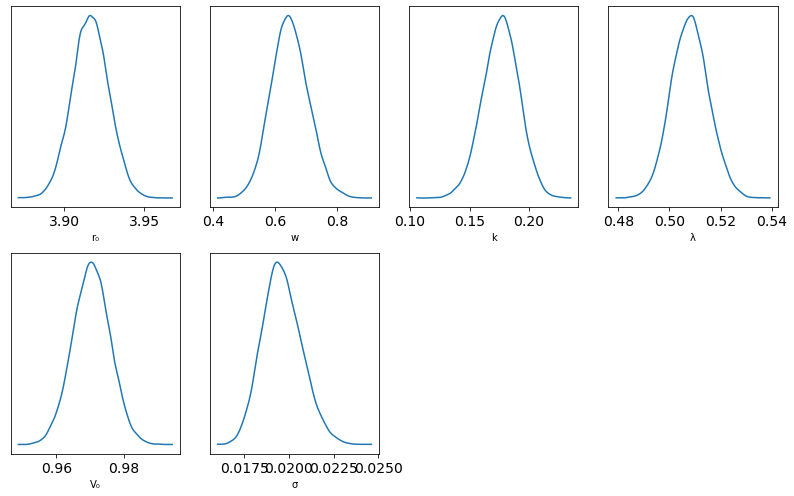

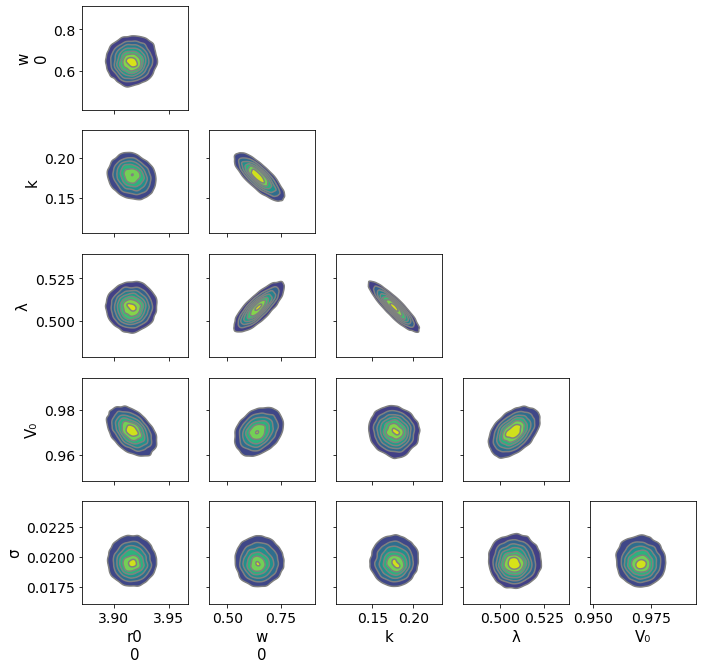

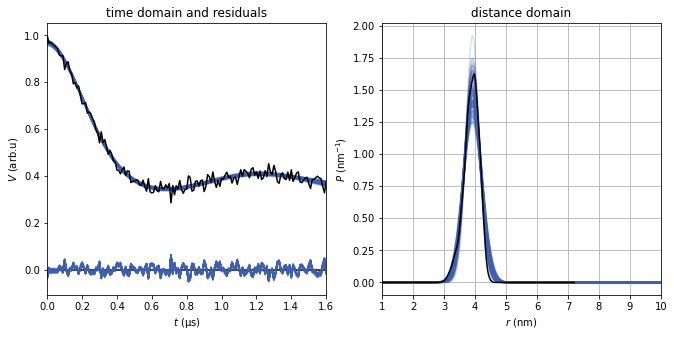

In [6]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 1}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

dive.summary(trace_gauss, model_gauss, Pid = Pid)  